In [1]:
# Project Title
# Downloading Dataset
# Data Preparation and Cleaning
# Exploratory Analysis and visualization
# Question and Answer
# Infrences and Conclusion
# References and Future work

# Project Title

IPL Dataset analaysis

# Downloading Dataset

# Random

In [2]:
!pip install tabulate

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
match_df = pd.read_csv('IPL_dataset/matches.csv')
deliveries_df = pd.read_csv('IPL_dataset/deliveries.csv')
ras_df = pd.read_csv('IPL_dataset/most_runs_average_strikerate.csv')
players_df = pd.read_excel (r'IPL_dataset\Players.xlsx')
players_df.to_csv (r'IPL_dataset\Players.csv', index = None, header=True)

In [5]:
dismissal_df = deliveries_df.dropna(subset=['player_dismissed'])
dismissal_main_df = dismissal_df.loc[(dismissal_df['dismissal_kind']!='run out')&(dismissal_df['dismissal_kind']!='obstructing the field')&(dismissal_df['dismissal_kind']!='retired hurt')]

In [6]:
innings1_df = deliveries_df[deliveries_df['inning']==1] # First Innings data
innings2_df = deliveries_df[deliveries_df['inning']==2] # Second Innings data

### Adding Bowling_Type column in players_df

In [7]:
# Changing 'Legbreak googly' into 'Legbreak'
players_df['Bowling_Skill'] = players_df['Bowling_Skill'].str.replace('Legbreak googly', 'Legbreak')

# Changing 'Right-arm Fast' into 'Right-arm fast'
players_df['Bowling_Skill'] = players_df['Bowling_Skill'].str.replace('Right-arm Fast', 'Right-arm fast')

# Changing 'Right-arm Medium' into 'Right-arm medium'
players_df['Bowling_Skill'] = players_df['Bowling_Skill'].str.replace('Right-arm Medium', 'Right-arm medium')


# Change misspelled Bowling_Skill before the function and update the type_list as such.

def bowling_type(df):
    type_list = ['Right-arm medium', 'Right-arm fast-medium', 'Right-arm medium-fast', 'Right-arm fast', 'Left-arm fast-medium',
       'Left-arm medium-fast', 'Left-arm medium', 'Left-arm fast']
    
    if (df['Bowling_Skill'] in type_list):
        val = 'Pace'
        
    else:
        val = 'Spin'
        
    return val

players_df['Bowling_Type'] = players_df.apply(bowling_type, axis = 1)

## Boundary(4&6) Hitting Record for MVP batsman

### Creating Function for Data Extraction

Defining a function that takes player name run and innings and gives output as list of frequency of that runs scored in every over.

            def get_batsman_info(player, run, innings):
                player_df = deliveries_df[deliveries_df['batsman']==player]
                record_df = player_df.loc[(player_df['inning']==innings)&(player_df['batsman_runs']==run)]
                over_df = record_df[['over']].value_counts().sort_index()
                return over_df
                
The above function  

## Function Player profile:
provides data of selected batsman,

In [8]:
class Player_profile(): 
    def __init__(self, player):
        self.player_df = deliveries_df[deliveries_df['batsman']==player]
        
#     Function to display record of a player in  a dataframe
        
    def display_record(self, column):
        self.column_df = self.player_df[[column]]
        return self.column_df
    
#     Function to get runs scored by batsmen in match and both innings
        
    def get_batsman_info(self, run, innings=False):
        
        self.record_df = self.player_df.loc[(self.player_df['batsman_runs']==run)]
        
        if innings: 
            self.record_df = self.player_df.loc[(self.player_df['inning']==innings)&(self.player_df['batsman_runs']==run)]

        self.over_df = self.record_df[['over']].value_counts().sort_index().to_frame('freq').reset_index()    
        return self.over_df
    
#     Function to get runs of batsman vs bowler

    def runs_against_bowler(self, bowler):
        self.runs_against_df = self.player_df.loc[deliveries_df['bowler']==bowler].batsman_runs.sum()
        return self.runs_against_df

In [9]:
# Batsman vs bowler function
# for the batsman, takes the bowler name and returns the number of runs scored by the batsmen vs that bowler

# temp_df = deliveries_df.loc[(deliveries_df['batsman']=='DA Warner')&(deliveries_df['bowler']=='TS Mills')]
# temp_df

In [10]:
#  Checking Player_profile function

# dhawan = Player_profile('S Dhawan')
# dhawan.runs_against_bowler('SL Malinga')

In [11]:
# dhawan.display_record('batsman_runs')

In [12]:
list1 = ['V Kohli', 'RG Sharma', 'CH Gayle', 'SR Watson', 'DA Warner', 'RR Pant', 'CH Morris', 'AD Russell']
list2 = ['SL Malinga', 'HH Pandya', 'RA Jadeja', 'YS Chahal', 'DJ Bravo', 'A Mishra', 'PP Chawla', 'Harbhajan Singh']
list3 = ['V Kohli']
list4 = ['A Mishra']

In [13]:
C_Gayle = Player_profile('CH Gayle')
# C_Gayle.runs_against_bowler('SL Malinga')

In [14]:
# x= 'V_Kohli'
# y= 'V Kohli'
# z= 'SL Malinga'
# data_test = Player_profile(y)
# data_test.runs_against_bowler(z)

In [15]:
# Function to get dataframe of runs scored by batsman against bowler
# Change the function name and variable

def bat_against_bowl(list1, list2):
    arr_temp1 = []
    arr_temp2 = []

    for i in list1:
        temp = Player_profile(i)

        for j in list2:
            data_temp = temp.runs_against_bowler(j)
            arr_temp1.append(data_temp)
            
    for elem in range(0, len(list1)):
        arr_temp2.append(arr_temp1[elem*len(list2):(elem+1)*len(list2)])
    
    df_test = pd.DataFrame(arr_temp2, list1, list2)

    return (df_test)

In [16]:
mvp_df = ras_df.loc[(ras_df['average']>=30) & (ras_df['strikerate']>=130)]
impact_df = ras_df.loc[(ras_df['average']>=25) & (ras_df['total_runs']>=500)].sort_values('strikerate', ascending = False)

batsman_list = mvp_df['batsman'].head(10).tolist()
batsman_list2 = impact_df['batsman'].head(10).tolist()

In [17]:
dismissal_df = deliveries_df.dropna(subset=['player_dismissed'])
bowler_out_df = dismissal_df[dismissal_df.dismissal_kind!='run out']
bowler_list = bowler_out_df['bowler'].value_counts().head(10).index

In [18]:
data_viz = bat_against_bowl(batsman_list, bowler_list)

In [19]:
data_viz2 = bat_against_bowl(batsman_list2, bowler_list)

# Data for batsman against different bowling skill
   Total number of runs scored by batsman against various styles of bowling 

## Merging player_df with deliveries_df
Taking bowling_skills column from player_df and merging them with deliveries_df to get bowling style merge dataframe

In [20]:
# Fix the bug in bowling_type() to use Bowling_Type > bug fixed now.

bowling_skill_df = players_df[['Player_Name', 'Bowling_Skill', 'Bowling_Type']].rename(columns={'Player_Name':'bowler'})

# Using the dataframe without Bowling_Type for now

bowling_skill_df = players_df[['Player_Name', 'Bowling_Skill']].rename(columns={'Player_Name':'bowler'})

In [21]:
players_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Bowling_Type
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,Pace
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,Spin
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,Spin
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN,Pace
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN,Spin
...,...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan,Pace
562,YS Chahal,1990-07-23,Right_Hand,Legbreak,India,Spin
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India,Spin
564,YV Takawale,1984-11-05,Right_Hand,NaN,India,Spin


In [22]:
batsman_run_df = deliveries_df[['inning', 'over', 'ball', 'batsman', 'bowler', 'batsman_runs', 'total_runs']]

In [23]:
style_merge_df = pd.merge( batsman_run_df, bowling_skill_df, on='bowler')

In [24]:
style_merge_df

,inning,over,ball,batsman,bowler,batsman_runs,total_runs,Bowling_Skill
0,1,1,1,DA Warner,TS Mills,0,0,Left-arm fast
1,1,1,2,DA Warner,TS Mills,0,0,Left-arm fast
2,1,1,3,DA Warner,TS Mills,4,4,Left-arm fast
3,1,1,4,DA Warner,TS Mills,0,0,Left-arm fast
4,1,1,5,DA Warner,TS Mills,0,2,Left-arm fast
...,...,...,...,...,...,...,...,...
179073,2,13,2,RG Sharma,S Warrier,0,0,Right-arm fast-medium
179074,2,13,3,RG Sharma,S Warrier,2,2,Right-arm fast-medium
179075,2,13,4,RG Sharma,S Warrier,1,1,Right-arm fast-medium
179076,2,13,5,AS Yadav,S Warrier,1,1,Right-arm fast-medium


In [25]:
# Function to get batsman run against various bowling skill

def runs_against_style(list1, list2):
    df = []
    df2 = []
    for i in list1:
        batsman = style_merge_df[style_merge_df['batsman']==i]
        for j in list2:
            runs_against_style = batsman[batsman['Bowling_Skill']==j]['batsman_runs'].sum()
            df.append(runs_against_style)
    for elem in range(0,len(list1)):
        df2.append(df[elem*len(list2):(elem+1)*len(list2)])
    return df2

In [26]:
list_bowling_style = style_merge_df['Bowling_Skill'].value_counts().index

In [27]:
runs_against = runs_against_style(list1, list_bowling_style)

In [28]:
runs_against_skill_df = pd.DataFrame(runs_against, list1, list_bowling_style)

In [29]:
runs_against_skill_df

,Right-arm medium,Right-arm fast-medium,Right-arm offbreak,Slow left-arm orthodox,Right-arm medium-fast,Legbreak,Right-arm fast,Left-arm fast-medium,Left-arm medium-fast,Left-arm medium,Left-arm fast,Slow left-arm chinaman
V Kohli,1009,688,659,610,620,669,435,317,208,76,48,95
RG Sharma,710,887,523,557,611,570,580,146,194,51,44,41
CH Gayle,821,540,610,350,615,431,533,226,165,176,56,37
SR Watson,690,521,303,572,358,406,345,165,108,82,52,12
DA Warner,889,645,873,327,408,490,532,259,91,57,80,90
RR Pant,301,227,302,112,102,329,187,100,14,61,21,36
CH Morris,161,81,32,18,80,57,23,41,2,5,9,11
AD Russell,309,282,35,120,203,164,197,37,16,51,14,17


## Function Bowling data:
provides information of bowler

In [30]:
class Bowling_data():
    def __init__(self):
        self.total_games = match_df.index[-1]+1
        
    def over_run(self, over, innings=False): 
        if innings:
            self.over_run_df = deliveries_df[['over', 'total_runs']].loc[(deliveries_df['inning']==innings)&(deliveries_df['over']==over)]
        else:
            self.over_run_df = deliveries_df[['over', 'total_runs']].loc[deliveries_df['over']==over]
        return self.over_run_df
    
    def per_over_run(self, over, innings=False):
        total_over_run = Bowling_data().over_run(over, innings).total_runs.sum()
        self.per_over_run = total_over_run//self.total_games
        return self.per_over_run

In [31]:
# checking over_run function

# check = Bowling_data()
# check.over_run(12)

In [32]:
# checking per_over_run() function

# por = Bowling_data().per_over_run(1)
# por

### Function to get bowlers record against RHB/LHB

In [33]:
# create a function in Bowling_data() bowler_record_df:
#     That takes bowlers name and gives run conceded by the bowler
Bowling_data()

In [34]:
bowler_df = deliveries_df[['bowler', 'batsman_runs', 'total_runs']][deliveries_df['bowler']=='TS Mills']['batsman_runs'].sum()
bowler_df

144

In [35]:
players_df['Batting_Hand'] = players_df['Batting_Hand'].str.replace('Right_hand', 'Right_Hand')
players_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Bowling_Type
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India,Pace
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India,Spin
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India,Spin
3,A Choudhary,NaT,Right_Hand,Left-arm fast-medium,NaN,Pace
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN,Spin
...,...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan,Pace
562,YS Chahal,1990-07-23,Right_Hand,Legbreak,India,Spin
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India,Spin
564,YV Takawale,1984-11-05,Right_Hand,NaN,India,Spin


In [36]:
batsman_hand_df = players_df[['Player_Name', 'Batting_Hand']].rename(columns={'Player_Name':'batsman'})

In [37]:
# Merging data for hand and dismissals 
dismissal_hand_df = dismissal_main_df[['batsman','bowler']]
dismissal_merge_df = pd.merge( dismissal_hand_df, batsman_hand_df, on='batsman')
dismissal_merge_df

,batsman,bowler,Batting_Hand
0,DA Warner,A Choudhary,Left_Hand
1,DA Warner,Harbhajan Singh,Left_Hand
2,DA Warner,Kuldeep Yadav,Left_Hand
3,DA Warner,CH Morris,Left_Hand
4,DA Warner,JD Unadkat,Left_Hand
...,...,...,...
7963,S Rutherford,S Gopal,Left_Hand
7964,S Rutherford,B Kumar,Left_Hand
7965,S Rutherford,Harbhajan Singh,Left_Hand
7966,M Santner,SL Malinga,Left_Hand


In [38]:
hand_merge_df = pd.merge( batsman_run_df, batsman_hand_df, on='batsman')

In [39]:
bo = hand_merge_df[hand_merge_df['bowler']=='PP Chawla']
lh = bo.loc[bo['Batting_Hand']=='Left_Hand']['batsman_runs'].sum()
rh = bo.loc[bo['Batting_Hand']=='Right_Hand']['batsman_runs'].sum()

In [40]:
bowl = dismissal_merge_df[dismissal_merge_df['bowler']=='SL Malinga']
wickets_df = bowl['bowler'].value_counts()
right_wicket_df = bowl.loc[bowl['Batting_Hand']=='Right_Hand']['bowler'].count()
left_wicket_df = bowl.loc[bowl['Batting_Hand']=='Left_Hand']['bowler'].count()

In [41]:
# Function to get wickets by bowlers against RHB/LHB

def wickets_against_hand(bowler_list):
    dataframe = []
    hand_style = ['RHB', 'LHB']
    
    for i in bowler_list:
        bowler = dismissal_merge_df[dismissal_merge_df['bowler']==i]
        wickets_against_rh = bowler.loc[bowler['Batting_Hand']=='Right_Hand']['bowler'].count()
        wickets_against_lh = bowler.loc[bowler['Batting_Hand']=='Left_Hand']['bowler'].count()
        
        dataframe.append([wickets_against_rh,wickets_against_lh])
    
    df2= pd.DataFrame(dataframe, bowler_list, hand_style )
    return df2


In [42]:
dismissal_main_df[dismissal_main_df['dismissal_kind']=='hit wicket']

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
9261,40,1,Kolkata Knight Riders,Rising Pune Supergiant,4,6,SP Jackson,G Gambhir,Washington Sundar,0,...,0,0,0,0,0,0,0,SP Jackson,hit wicket,NaN
16220,69,2,Mumbai Indians,Kings XI Punjab,18,2,MA Khote,DS Kulkarni,S Sreesanth,0,...,0,0,0,0,0,0,0,MA Khote,hit wicket,NaN
21893,94,1,Royal Challengers Bangalore,Kings XI Punjab,5,6,Misbah-ul-Haq,V Kohli,S Sreesanth,0,...,0,0,0,0,0,0,0,Misbah-ul-Haq,hit wicket,NaN
31891,137,2,Rajasthan Royals,Chennai Super Kings,6,3,SA Asnodkar,RJ Quiney,JA Morkel,0,...,0,0,0,0,0,0,0,SA Asnodkar,hit wicket,NaN
73687,313,1,Chennai Super Kings,Deccan Chargers,18,2,RA Jadeja,DJ Bravo,DW Steyn,0,...,0,0,0,0,0,0,0,RA Jadeja,hit wicket,NaN
86635,367,1,Royal Challengers Bangalore,Mumbai Indians,7,3,SS Tiwary,TM Dilshan,Harbhajan Singh,0,...,0,0,0,0,0,0,0,SS Tiwary,hit wicket,NaN
145035,613,1,Sunrisers Hyderabad,Mumbai Indians,20,4,Yuvraj Singh,S Dhawan,MJ McClenaghan,0,...,0,0,0,0,0,0,0,Yuvraj Singh,hit wicket,NaN
146217,618,1,Sunrisers Hyderabad,Delhi Daredevils,18,6,DJ Hooda,KS Williamson,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,DJ Hooda,hit wicket,NaN
147152,622,2,Sunrisers Hyderabad,Kings XI Punjab,13,1,DA Warner,DJ Hooda,AR Patel,0,...,0,0,0,0,0,0,0,DA Warner,hit wicket,NaN
175184,11334,2,Rajasthan Royals,Kolkata Knight Riders,19,5,R Parag,J Archer,AD Russell,0,...,0,0,0,0,0,0,0,R Parag,hit wicket,NaN


In [46]:
# Get data for dismisal kind of bowlers for LHB/RHB 
# Use the data for probablities in violinplot graph

def dismissal_type_df(bowler_list):

    dismissal_list = dismissal_main_df['dismissal_kind'].value_counts().index
    dismissal_array = []
    dis_array = []
    for i in bowler_list:
        bowl_out = dismissal_main_df[dismissal_main_df['bowler']==i]
        for j in dismissal_list:
            dismissal_list_df = bowl_out[bowl_out['dismissal_kind']==j]['player_dismissed'].count()
            dis_array.append(dismissal_list_df)
    
    for elem in range(0, len(bowler_list)):
        dismissal_array.append(dis_array[elem*len(dismissal_list):(elem+1)*len(dismissal_list)])

    series = pd.DataFrame(dismissal_array, bowler_list, dismissal_list)
    
    return series

In [47]:
#  Function to get runs conceded by bowlers against RHB/LHB

def runs_against_hand(bowler_list):

    df_store=[]
    hand_style = ['RHB', 'LHB']
    for i in bowler_list:
        bowler = hand_merge_df[hand_merge_df['bowler']==i]
        runs_against_rh = bowler.loc[bowler['Batting_Hand']=='Right_Hand']['batsman_runs'].sum()
        runs_against_lh = bowler.loc[bowler['Batting_Hand']=='Left_Hand']['batsman_runs'].sum()

        df_store.append([runs_against_rh,runs_against_lh])
    df2= pd.DataFrame(df_store, bowler_list, hand_style )
    return df2

In [48]:
hand_df = runs_against_hand(list2)
hand_df

,RHB,LHB
SL Malinga,2283,935
HH Pandya,930,383
RA Jadeja,2308,809
YS Chahal,1471,829
DJ Bravo,2511,1021
A Mishra,2796,931
PP Chawla,2680,1342
Harbhajan Singh,2390,1490


In [49]:
# ax = sns.violinplot(x=hand_df.index, y=hand_df.columns, data=hand_df, split=True)

In [50]:
list2

['SL Malinga',
 'HH Pandya',
 'RA Jadeja',
 'YS Chahal',
 'DJ Bravo',
 'A Mishra',
 'PP Chawla',
 'Harbhajan Singh']

## Function to get per over average runs in all the match

In [51]:
# Change variable names

def per_over_avg_run(innings=False):
        arr1 = []
        for i in range(1,21):
            if innings:
                arr1.append(Bowling_data().per_over_run(i, innings)) 
            else:
                arr1.append(Bowling_data().per_over_run(i))
                
        arr1 = np.array(arr1)
        
        index_values = []
        for j in range(1,21):
            index_values.append(j)
            
        if innings==1:
            column_value = ['Avg Run 1st Innings']
        elif innings==2:
            column_value = ['Avg Run 2nd Innings']
        else:
            column_value = ['Average Run']
        
        data1 = pd.DataFrame(arr1,index_values, column_value)
        data1.index.name = 'Over'
        return data1

In [52]:
# Change variable name
# Change name in graph plot aswell
df = per_over_avg_run()
df1 = per_over_avg_run(1)
df2 = per_over_avg_run(2)

In [53]:
# checking per_over_avg_run function

# per_over_avg_run(1)

In [54]:
gayle = Player_profile('CH Gayle')
gayle6 = gayle.get_batsman_info(6)
gayle4 = gayle.get_batsman_info(4)

In [55]:
# Checking for Bowling_func()

# bo = Bowling_data()
# bo.over_run(1,1)

### Data for dismissal

In [56]:
out_df = deliveries_df.dropna(subset=['player_dismissed']).loc[(deliveries_df['dismissal_kind']!='run out')]
data_df = out_df.value_counts('over').sort_index().to_frame('Total Dismissals')
data_df

,Total Dismissals
over,
1,285
2,323
3,346
4,359
5,365
6,355
7,279
8,297
9,337


In [57]:
# Select id result winner win_by_runs win_by_wickets player_of_match from match_df

match2_df = match_df[['id', 'result', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match']]

In [58]:
# change name of match_id  to id

deliveries2_df = deliveries_df.rename(columns={'match_id':'id'})

In [59]:
match_merge_df = pd.merge(match2_df, deliveries2_df, on='id')
match_merge_df[['id', 'winner', 'win_by_runs', 'player_of_match', 'over', 'ball']]

,id,winner,win_by_runs,player_of_match,over,ball
0,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,1
1,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,2
2,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,3
3,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,4
4,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,5
...,...,...,...,...,...,...
179073,11415,Mumbai Indians,1,JJ Bumrah,20,2
179074,11415,Mumbai Indians,1,JJ Bumrah,20,3
179075,11415,Mumbai Indians,1,JJ Bumrah,20,4
179076,11415,Mumbai Indians,1,JJ Bumrah,20,5


In [60]:
test = match_merge_df['id']
# pd.unique(test)

test2 = match_merge_df.loc[(pd.unique(match_merge_df['id']))]

In [61]:
test2[['id', 'winner', 'win_by_runs', 'player_of_match', 'over', 'ball']]

,id,winner,win_by_runs,player_of_match,over,ball
1,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,2
2,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,3
3,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,4
4,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,5
5,1,Sunrisers Hyderabad,35,Yuvraj Singh,1,6
...,...,...,...,...,...,...
11347,48,Kings XI Punjab,14,MM Sharma,20,1
11412,49,Delhi Daredevils,0,SS Iyer,10,4
11413,49,Delhi Daredevils,0,SS Iyer,10,5
11414,49,Delhi Daredevils,0,SS Iyer,10,6


In [62]:
test2

,id,result,winner,win_by_runs,win_by_wickets,player_of_match,inning,batting_team,bowling_team,over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1,1,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,48,normal,Kings XI Punjab,14,0,MM Sharma,2,Kolkata Knight Riders,Kings XI Punjab,20,...,0,0,0,0,1,0,1,NaN,NaN,NaN
11412,49,normal,Delhi Daredevils,0,2,SS Iyer,1,Gujarat Lions,Delhi Daredevils,10,...,0,0,0,0,1,0,1,NaN,NaN,NaN
11413,49,normal,Delhi Daredevils,0,2,SS Iyer,1,Gujarat Lions,Delhi Daredevils,10,...,0,0,0,0,1,0,1,NaN,NaN,NaN
11414,49,normal,Delhi Daredevils,0,2,SS Iyer,1,Gujarat Lions,Delhi Daredevils,10,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [63]:
# Loop through to get id from match_df 
# Then use that id in deliveires_df
# Then for the match get the over 
# Then for the overs loop through the balls
# and get the data.



# for i in (match_df['id']):
#     test_array = []
#     test_array.append(i)
#     print(i)

In [64]:
win_runs_df = match_df.sort_values('win_by_runs', ascending=False)
win_wickets_df = match_df.sort_values('win_by_wickets', ascending=False)

# DataFrame for runs against Pace vs Spin

In [65]:
batsman_df = players_df[['Player_Name','Batting_Hand','Bowling_Type']].rename(columns={'Player_Name':'bowler'})

In [66]:
runs_df = deliveries_df[['batsman', 'bowler', 'batsman_runs']]

In [67]:
batsman_merge_df = pd.merge(runs_df, batsman_df, on='bowler')

In [68]:
batsman_list_df2 = batsman_merge_df[batsman_merge_df.batsman.isin(batsman_list)]

# DataFrame for bowlers dismissal ball against Left and Right handed batsman

In [116]:
dismissal_main2_df = dismissal_main_df.drop(['batting_team', 'bowling_team', 'player_dismissed', 'non_striker', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'fielder'], axis=1)

In [117]:
merge_dismissal_df = pd.merge(dismissal_main2_df, batsman_hand_df, on='batsman')
bowler_list_df = merge_dismissal_df[merge_dismissal_df.bowler.isin(list2)]

## Data For Toss

In [70]:
# toss_decision
# field    463
# bat      293

### Toss winner = winner

In [71]:
# Dataframe for when toss winner = winner

Toss_win = match_df.loc[match_df.toss_winner==match_df.winner].value_counts('winner').to_frame('Total wins')

### Toss winner elects  to field and win

In [72]:
# Dataframe for when team elected to field and won

field_win = match_df.loc[(match_df['toss_decision']=='field')&(match_df.toss_winner==match_df.winner)].value_counts('winner').to_frame('Total Wins')

### Toss winner elects to bat and win

In [73]:
# Dataframe for when team elected to bat and won

bat_win = match_df.loc[(match_df['toss_decision']=='bat')&(match_df.toss_winner==match_df.winner)].value_counts('winner').to_frame('Total Wins')

In [74]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [75]:
ras_df.loc[ras_df['total_runs']>=500].sort_values('strikerate', ascending=False).head()

,batsman,total_runs,out,numberofballs,average,strikerate
49,AD Russell,1415,41,752,34.512195,188.164894
82,SP Narine,785,40,458,19.625000,171.397380
38,RR Pant,1767,49,1071,36.061224,164.985994
50,GJ Maxwell,1401,62,864,22.596774,162.152778
103,CH Morris,519,20,327,25.950000,158.715596


In [76]:
ras_df.loc[ras_df['total_runs']>=100].sort_values('out')

,batsman,total_runs,out,numberofballs,average,strikerate
180,MN van Wyk,167,3,132,55.666667,126.515152
222,DJ Harris,111,3,101,37.000000,109.900990
225,LJ Wright,106,4,60,26.500000,176.666667
200,Kamran Akmal,128,4,78,32.000000,164.102564
159,PD Collingwood,203,4,156,50.750000,130.128205
...,...,...,...,...,...,...
11,KD Karthik,3669,138,2813,26.586957,130.430146
0,V Kohli,5426,152,4111,35.697368,131.987351
7,RV Uthappa,4420,156,3381,28.333333,130.730553
1,SK Raina,5386,160,3916,33.662500,137.538304


### Boundaries Data Visual

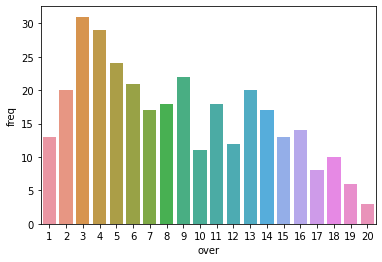

In [77]:
# sns.barplot(x = 'over', y = 'freq', data=gayle6)
sns.barplot(x = 'over', y = 'freq', data=gayle6)
 
# Show the plot 
plt.show()

## Data Visual for per over avg run in a match and both innings

### Match

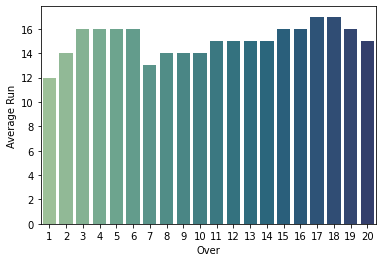

In [78]:
sns.barplot(x = df.index, y = 'Average Run', data=df, palette= 'crest')
 
# Show the plot
plt.show()

### Innings 1

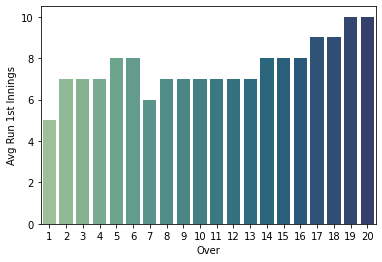

In [79]:
sns.barplot(x = df1.index, y = 'Avg Run 1st Innings', data=df1, palette= 'crest')
 
# Show the plot
plt.show()

### Innings 2

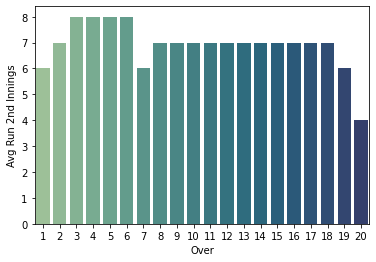

In [80]:
sns.barplot(x = df2.index, y = 'Avg Run 2nd Innings', data=df2, palette= 'crest')
 
# Show the plot
plt.show()

### Line Graph

In [81]:
# Merging match and innings dataframe

frames = [df, df1, df2]
res = pd.concat(frames, axis=1, join = 'inner')
res

,Average Run,Avg Run 1st Innings,Avg Run 2nd Innings
Over,,,
1,12,5,6
2,14,7,7
3,16,7,8
4,16,7,8
5,16,8,8
6,16,8,8
7,13,6,6
8,14,7,7
9,14,7,7


In [82]:
# Merging Innings dataframe

frames2 = [df1, df2]
res2 = pd.concat(frames2, axis=1, join = 'inner')
res2

,Avg Run 1st Innings,Avg Run 2nd Innings
Over,,
1,5,6
2,7,7
3,7,8
4,7,8
5,8,8
6,8,8
7,6,6
8,7,7
9,7,7


<AxesSubplot:xlabel='Over'>

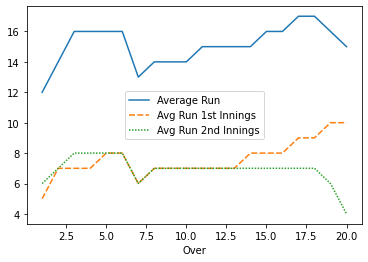

In [83]:
sns.lineplot(data=res)

<AxesSubplot:xlabel='Over'>

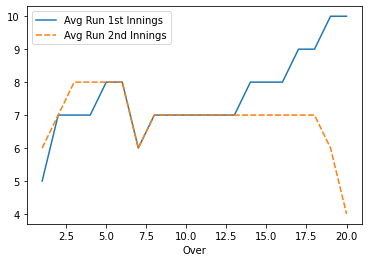

In [84]:
sns.lineplot(data=res2)

<AxesSubplot:xlabel='Over'>

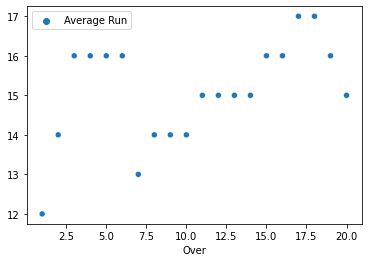

In [85]:
sns.scatterplot(data=df)

### Data Visual for most dismissal per over

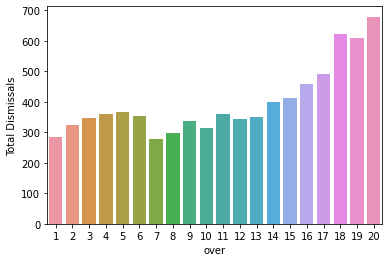

In [86]:
# Per over avg wicket in IPL
sns.barplot(x = data_df.index, y = 'Total Dismissals', data=data_df)
 
# Show the plot
plt.show()

## Toss Data Visualization

### Toss1

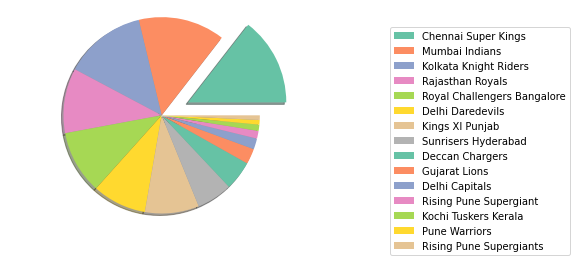

In [87]:
# Pie chart for Toss_win dataframe
# 15 teams

myexplode = [0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(Toss_win['Total wins'], colors = sns.color_palette('Set2'), explode=myexplode, shadow=True)
plt.legend(Toss_win.index, bbox_to_anchor=(1,0), loc="lower left", bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.show()

### Toss2

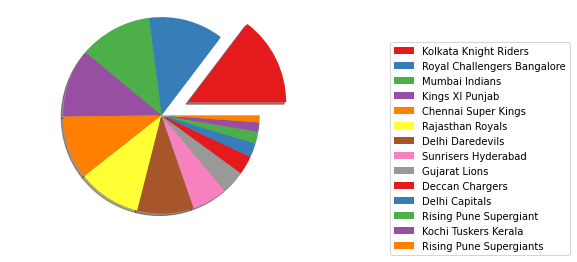

In [88]:
# Pie chart for field_win dataframe
# 14 teams

myexplode = [0.3,0,0,0,0,0,0,0,0,0,0,0,0,0]
plt.pie(field_win['Total Wins'], colors = sns.color_palette('Set1'), explode=myexplode, shadow=True)
plt.legend(field_win.index, bbox_to_anchor=(1,0), loc="lower left", bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.show()

### Toss3

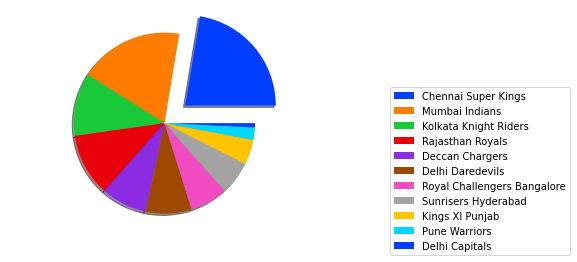

In [89]:
# Pie chart for bat_win dataframe 
# 11 teams

myexplode = [0.3,0,0,0,0,0,0,0,0,0,0]
plt.pie(bat_win['Total Wins'], colors = sns.color_palette('bright'), explode=myexplode, shadow=True)
plt.legend(bat_win.index, bbox_to_anchor=(1,0), loc="lower left", bbox_transform=plt.gcf().transFigure)
plt.axis('equal')
plt.show()

# Data Visualization

## Heat Maps

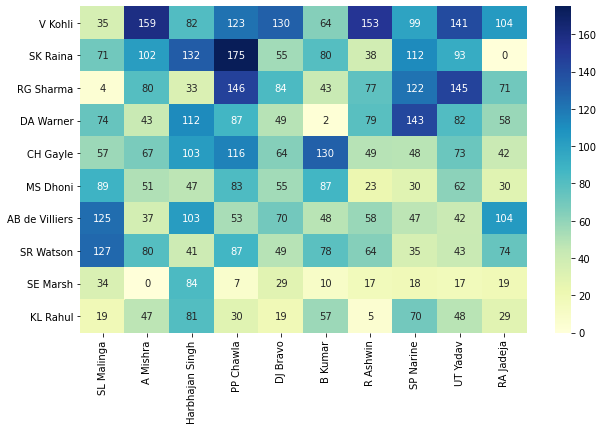

In [90]:
# Heat maps for teams

heat_map = plt.subplots(figsize=(10,6))  
heat_map = sns.heatmap(data_viz, cmap="YlGnBu", annot=True, fmt='d')

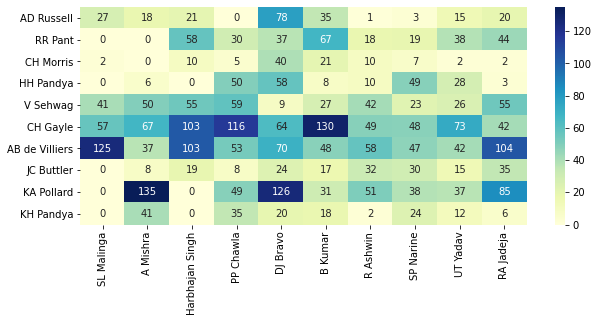

In [91]:
heat_map2 = plt.subplots(figsize=(10,4))  
heat_map2 = sns.heatmap(data_viz2, cmap="YlGnBu", annot=True, fmt='d')

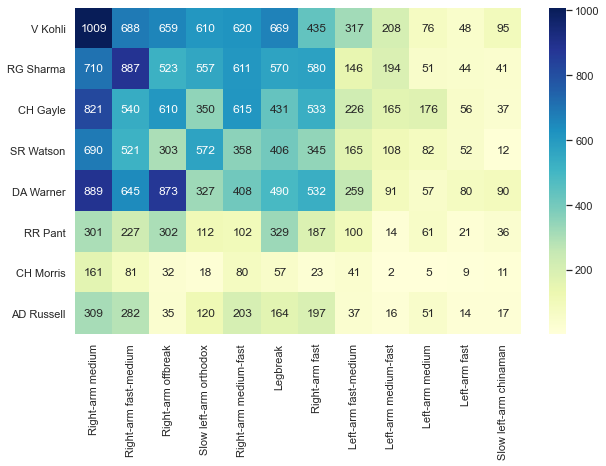

In [115]:
runs_against_skill = plt.subplots(figsize=(10,6))  
runs_against_skill = sns.heatmap(runs_against_skill_df, cmap="YlGnBu", annot=True, fmt='d')


# ViolinPlot Graph

## Batsman runs scored against Pace vs Spin

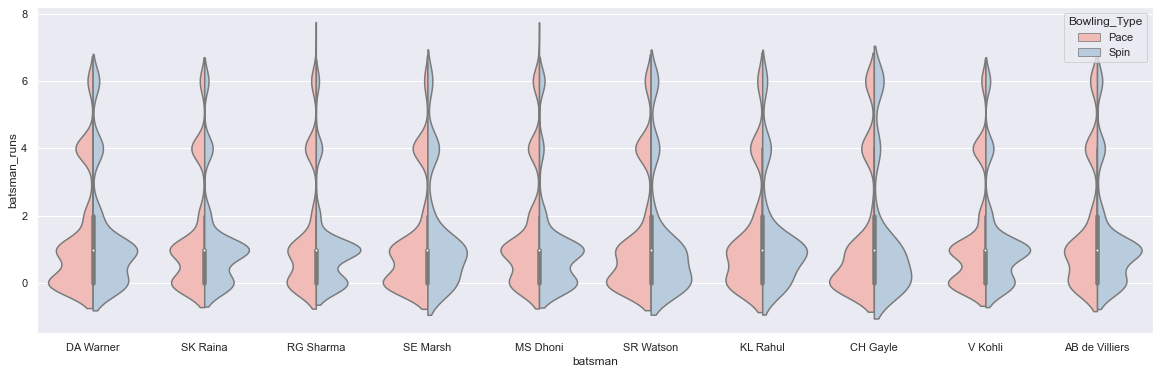

In [105]:
sns.set(style="darkgrid")
batsman_violinplot = plt.subplots(figsize=(20,6)) 
batsman_violinplot = sns.violinplot(x='batsman', y='batsman_runs', data=batsman_list_df2, hue = 'Bowling_Type', split = True, palette='Pastel1')

## Bowler dismissal on ball against Left vs Right handed batsman

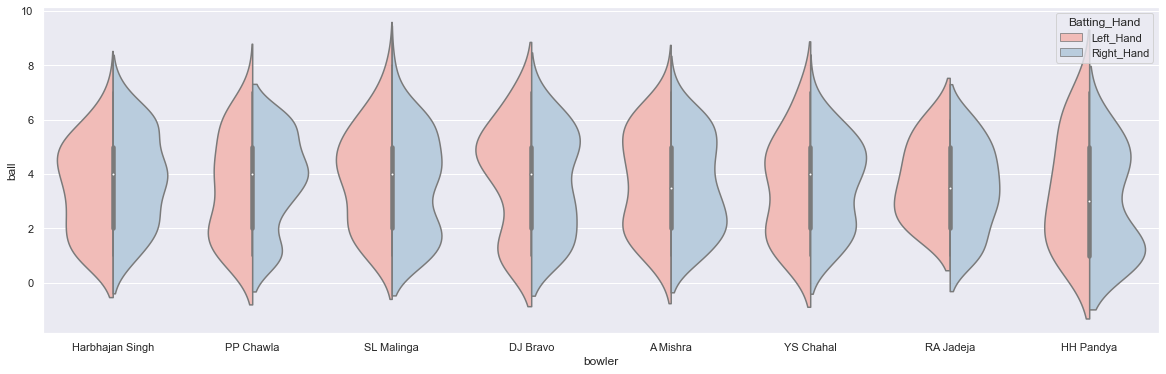

In [102]:
sns.set(style="darkgrid")
bowler_violinplot = ax = plt.subplots(figsize=(20,6)) 
bowler_violinplot = sns.violinplot(x= 'bowler', y='ball', data= bowler_list_df, hue='Batting_Hand', split=True, palette="Pastel1")

# Data Preparation and Cleaning

# Exploratory Analysis and Visualization

# Questions and Answers

# Infrences and Conclusions

# Refrences and Future Work